# Decision Tree Regression
-----

## Step 1: <span style="text-decoration:underline">Importing the libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span style="text-decoration:underline">Importing the dataset</span>

In [3]:
dataset = pd.read_csv("Crop_recommendation.csv")

In [4]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## Step 3:  <span style="text-decoration:underline">Data analysis</span>

In [7]:
# To analyze descriptive statistics of data
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

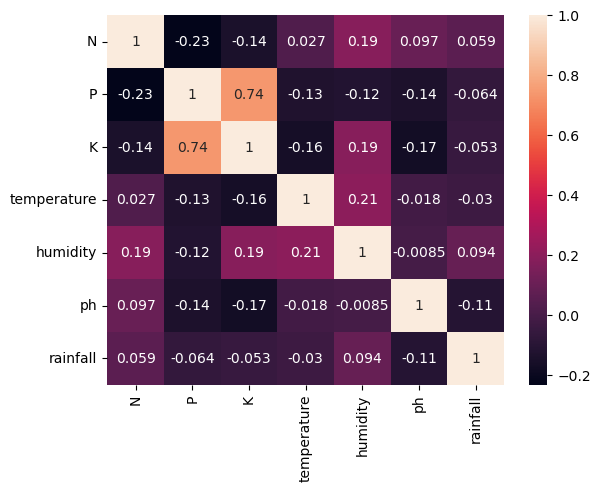

In [10]:
sns.heatmap(dataset.corr(),annot=True)

> The result of the previous cell is the correlation matrix. In general, I found that dealing with this matrix is easy.

   **The correlation matrix** is a table that shows the correlation coefficients between variables. Correlation coefficients range from -1 to 1:
   
- 1 means a perfect positive correlation.
- 0 means no correlation.
- -1 means a perfect negative correlation.

## Step 4: <span style="text-decoration:underline">Split the dataset into dependent/independent variables</span>

In [11]:
# independent variables
x = dataset.iloc[:,0:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

y = y.reshape(len(y),1)

## Step 5: <span style="text-decoration:underline">Data Preprocessing</span>

### the most commonly used techniques:

1. Label Encoding:

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = onehot_encoder.fit_transform(y.reshape(-1, 1))


2. One-Hot Encoding:

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)


> I will choose the second way

## Step 6:  <span style="text-decoration:underline">Spliting the dataset into thetraining set and test set</span>

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,encoded_y,test_size=0.2,
                                                   random_state=0)

## Step 7: <span style="text-decoration:underline">Training the Decision Tree Regression model on training set</span>

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

## Step 8: <span style="text-decoration:underline">Predicting The Test set results</span>

In [16]:
y_pred = regressor.predict(x_test)

In [17]:
df = pd.DataFrame({'Real Values':y_test.flatten().tolist(), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,21,21.0
1,21,21.0
2,7,7.0
3,3,3.0
4,2,2.0
...,...,...
435,18,18.0
436,1,1.0
437,6,6.0
438,2,2.0


## Step 9:  <span style="text-decoration:underline">Visualsing the Training set results</span>

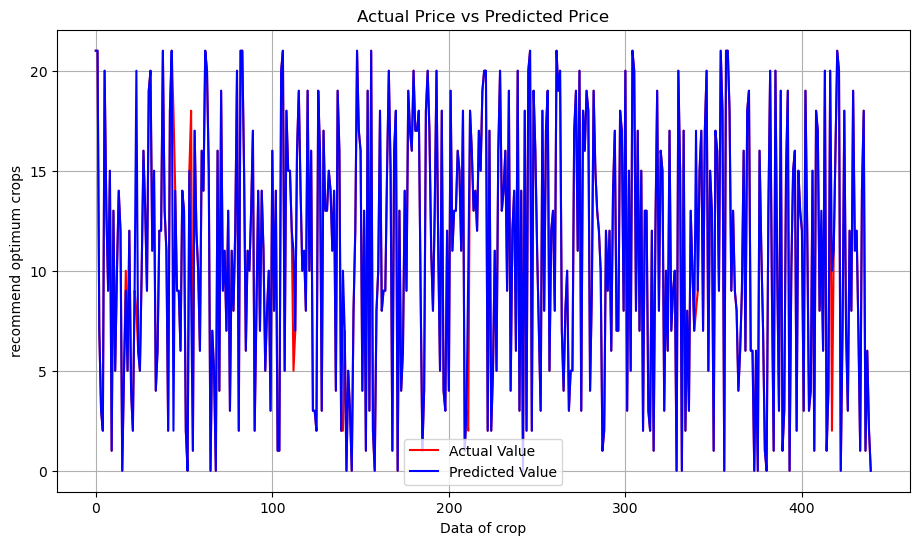

In [18]:
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Data of crop')
plt.ylabel('recommend optimum crops')
plt.legend()
plt.grid(True)
plt.show()

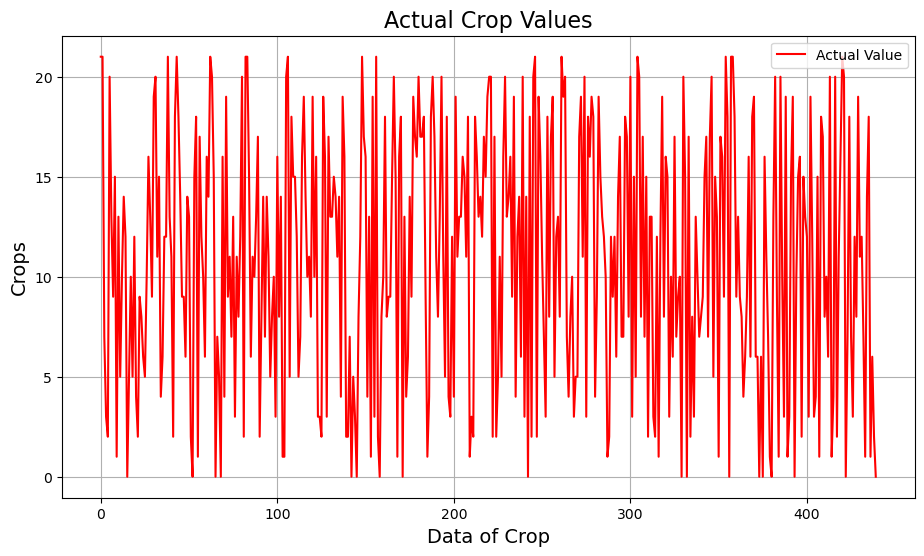

In [19]:
# Plot for Actual Values
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.title('Actual Crop Values', fontsize=16)
plt.xlabel('Data of Crop', fontsize=14)
plt.ylabel('Crops', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

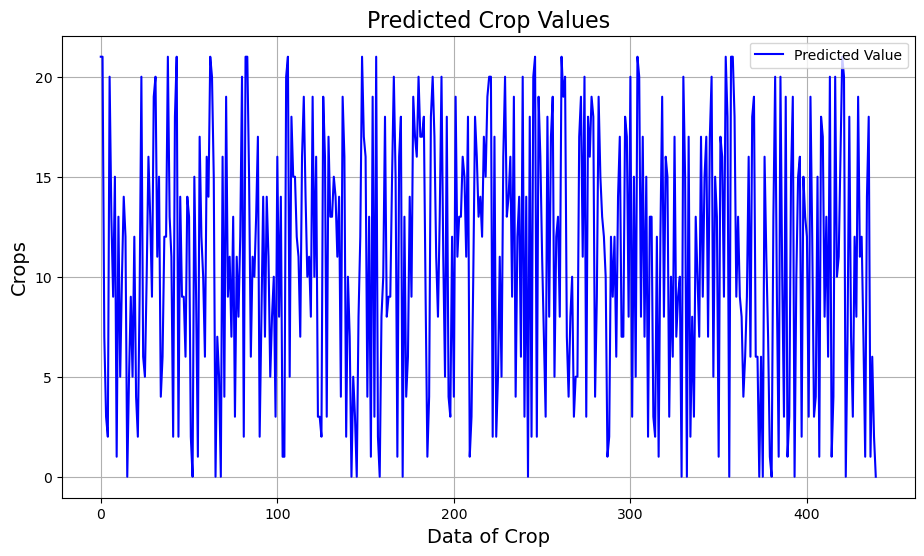

In [20]:
# Plot for Predicted Values
plt.figure(figsize=(11, 6))
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Predicted Crop Values', fontsize=16)
plt.xlabel('Data of Crop', fontsize=14)
plt.ylabel('Crops', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## step 10: <span style="text-decoration:underline">model evaluation</span>

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  1.8181818181818181
mean_absolute_error :  0.18181818181818182


## step 11: <span style="text-decoration:underline">Calculating R² with Scikit-Learn</span>

In [22]:
from sklearn.metrics import r2_score
R2_sklearn = r2_score(y_test, y_pred)
print(f"R² (Scikit-Learn Calculation): {R2_sklearn}")

R² (Scikit-Learn Calculation): 0.9550437754850387


## Sources:
----
- scikit-learn.org : https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- geeksforgeeks : https://www.geeksforgeeks.org/encoding-categorical-data-in-sklearn/
- geeksforgeeks : https://www.geeksforgeeks.org/how-to-calculate-r2-with-scikit-learn/
- kaggle : https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20